In [2]:
import pandas as pd

bids_df = pd.read_csv('data/bids.csv')
train_df = pd.read_csv('data/train.csv')

In [3]:
print(train_df.shape)
print(bids_df.shape)

(2013, 4)
(7656334, 9)


In [4]:
train_df.head()

,bidder_id,payment_account,address,outcome
0,4a791121f1d9c9c192d13051301984388c491,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,3b4586382b3ff164e8bad37b15a268a540996,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [5]:
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,c6faf9e526c72bc8383f2bc4417a465d2fa27,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,d96e93359ed70b7b4eebac163f448afeb50dc,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,065bdcc596308d1fdd0014261d6e198aa138e,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,e97aa310037dd210f52b5b164077a926bb5de,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,41a7f56fcc5771d305baa6e989fb2e8cceb21,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [6]:
print(train_df.bidder_id.nunique())
print(bids_df.bidder_id.nunique())

2013
6614


In [7]:
train_bidder_ids = list(train_df.bidder_id)
bids_bidder_ids = list(bids_df.bidder_id.unique())

print(train_bidder_ids[:5])

['4a791121f1d9c9c192d13051301984388c491', '6feeeab451fcc546e1c43867e04bd5d2294fc', '0bdfae6168380fa2e00853fd3d6199ba8ed7d', '3b4586382b3ff164e8bad37b15a268a540996', '10c7f4bdc67a50bab856b9ca76a83ce980f96']


In [8]:
not_found = []
for bidderid in train_bidder_ids:
    if bidderid not in bids_bidder_ids:
        not_found.append(bidderid)
print(len(not_found), 'bidder ids from train.csv are not found in bids.csv')

29 bidder ids from train.csv are not found in bids.csv


In [9]:
bidder_counts = bids_df.groupby("bidder_id")['time'].count().reset_index()
bidder_counts = bidder_counts.rename(columns={'time':'num_bids'})
bidder_counts

,bidder_id,num_bids
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7
2,002828f800c5132e297cfe3d44fbde9aeac51,2
3,00402f50c4086f320cb6bf94f04462ea32441,249
4,0040cea6b93afd86768c365d89513ffb7c0ba,31
...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,168
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,5
6611,ffde8717e9a547d536a4e9c3f44782829c021,24
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,3


In [10]:
feature_set = train_df.merge(bidder_counts, on='bidder_id', how='left')  
# Make sure NOT to use the default inner join (how='inner')
print(feature_set.isnull().sum())

feature_set['num_bids'] = feature_set['num_bids'].fillna(0)  # fill nas with zeros
feature_set.isnull().sum()

bidder_id           0
payment_account     0
address             0
outcome             0
num_bids           29
dtype: int64


bidder_id          0
payment_account    0
address            0
outcome            0
num_bids           0
dtype: int64

In [11]:
bidder_unique = bids_df.groupby("bidder_id").nunique()
bidder_unique

,bid_id,auction,merchandise,device,time,country,ip,url
bidder_id,,,,,,,,
0013f9b8d1f462df4462e1c1216e441ba6e18,8,6,1,7,8,2,8,4
0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1,7,7,4,7,4
002828f800c5132e297cfe3d44fbde9aeac51,2,2,1,1,2,1,2,1
00402f50c4086f320cb6bf94f04462ea32441,249,89,1,99,249,21,151,98
0040cea6b93afd86768c365d89513ffb7c0ba,31,23,1,21,31,6,28,4
...,...,...,...,...,...,...,...,...
ffd49be672b1ba493b07dccf29311045c5392,168,20,1,69,168,5,102,40
ffdd8ed91a683b0f2a8237798ebe9214e3c43,5,4,1,3,5,1,4,2
ffde8717e9a547d536a4e9c3f44782829c021,24,16,1,20,24,6,24,4


In [17]:
#check average unique bidders per auction
bid_auction_unique = bids_df[['bidder_id','auction']].groupby("auction").nunique()
print(bid_auction_unique.mean())

bidder_id    25.40303
dtype: float64


In [18]:
bidder_unique = bidder_unique.reset_index()
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,6,1,7,8,2,8,4
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1,7,7,4,7,4
2,002828f800c5132e297cfe3d44fbde9aeac51,2,2,1,1,2,1,2,1
3,00402f50c4086f320cb6bf94f04462ea32441,249,89,1,99,249,21,151,98
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,23,1,21,31,6,28,4
...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,168,20,1,69,168,5,102,40
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,5,4,1,3,5,1,4,2
6611,ffde8717e9a547d536a4e9c3f44782829c021,24,16,1,20,24,6,24,4
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,3,3,1,2,3,2,3,2


In [19]:
train_set = train_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
train_set = train_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
train_set = train_set.fillna(0)
train_set.isnull().sum()

bidder_id          0
outcome            0
num_bids           0
num_auct           0
num_merch_type     0
num_device_type    0
num_time           0
num_ctry           0
num_ip             0
num_url            0
dtype: int64

In [20]:
train_set

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0
...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [101]:
len(train_set[train_set['outcome'] == 1])

98

In [21]:
#creating time features
time_df = bids_df.sort_values(['bidder_id', 'time'])
time_df.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
438339,438339,0013f9b8d1f462df4462e1c1216e441ba6e18,2dfh7,jewelry,phone252,9761753578947368,in,109.120.101.102,j9r15qhlmx10q8m
739754,739754,0013f9b8d1f462df4462e1c1216e441ba6e18,befuo,jewelry,phone167,9763626789473684,in,249.82.135.248,vasstdc27m7nks3
784233,784233,0013f9b8d1f462df4462e1c1216e441ba6e18,8hp9m,jewelry,phone1,9763837789473684,in,238.201.42.88,j9r15qhlmx10q8m
1079438,1079438,0013f9b8d1f462df4462e1c1216e441ba6e18,2fdc6,jewelry,phone20,9764985631578947,us,82.73.208.210,eb7xzuinezymmgo
1098126,1098126,0013f9b8d1f462df4462e1c1216e441ba6e18,toxfq,jewelry,phone35,9765134105263157,in,177.111.118.89,y4n752u1rvmihsl
1430138,1430138,0013f9b8d1f462df4462e1c1216e441ba6e18,lae7k,jewelry,phone71,9767696210526315,in,11.95.119.189,j9r15qhlmx10q8m
1588558,1588558,0013f9b8d1f462df4462e1c1216e441ba6e18,8hp9m,jewelry,phone45,9768470947368421,in,201.170.80.59,vasstdc27m7nks3
1610781,1610781,0013f9b8d1f462df4462e1c1216e441ba6e18,8hp9m,jewelry,phone71,9768530000000000,in,42.61.162.189,j9r15qhlmx10q8m
248666,248666,0014e3b911d1420e43ced1dc4fc18fde0fd0c,aeqok,home goods,phone1557,9760108210526315,in,177.158.106.58,ylcz2qov0wu6m9p
517210,517210,0014e3b911d1420e43ced1dc4fc18fde0fd0c,khgus,home goods,phone25,9762191894736842,in,53.230.178.66,vasstdc27m7nks3


In [22]:
#Creating time difference for each bidder and dropping nan values
firstdiff = time_df.groupby('bidder_id')[['time']].diff()
time_df['first_diff'] = firstdiff
firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
firstdiff_feat.head(10)

,bidder_id,first_diff
739754,0013f9b8d1f462df4462e1c1216e441ba6e18,1.873211e+12
784233,0013f9b8d1f462df4462e1c1216e441ba6e18,2.110000e+11
1079438,0013f9b8d1f462df4462e1c1216e441ba6e18,1.147842e+12
1098126,0013f9b8d1f462df4462e1c1216e441ba6e18,1.484737e+11
1430138,0013f9b8d1f462df4462e1c1216e441ba6e18,2.562105e+12
1588558,0013f9b8d1f462df4462e1c1216e441ba6e18,7.747368e+11
1610781,0013f9b8d1f462df4462e1c1216e441ba6e18,5.905263e+10
517210,0014e3b911d1420e43ced1dc4fc18fde0fd0c,2.083684e+12
742654,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.450737e+12
1361703,0014e3b911d1420e43ced1dc4fc18fde0fd0c,3.622737e+12


In [23]:
#Create mean, median, std, min, max, interquartile range for the time difference for each bidder
bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals


,bidder_id,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,0013f9b8d1f462df4462e1c1216e441ba6e18,9.680602e+11,9.575254e+11,5.905263e+10,7.747368e+11,2.562105e+12,1.330789e+12
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,2.120026e+12,1.044379e+12,7.083684e+11,1.989842e+12,3.622737e+12,1.177842e+12
2,002828f800c5132e297cfe3d44fbde9aeac51,6.236816e+13,0.000000e+00,6.236816e+13,6.236816e+13,6.236816e+13,0.000000e+00
3,00402f50c4086f320cb6bf94f04462ea32441,5.466914e+10,7.332996e+10,5.263158e+07,2.442105e+10,3.827895e+11,6.607895e+10
4,0040cea6b93afd86768c365d89513ffb7c0ba,2.548244e+12,9.100694e+12,8.421053e+08,6.717368e+11,5.043837e+13,1.315197e+12
...,...,...,...,...,...,...,...
5552,ffd49be672b1ba493b07dccf29311045c5392,8.130728e+10,1.077236e+11,1.052632e+08,4.368421e+10,7.146842e+11,8.165789e+10
5553,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.467118e+13,2.706620e+13,7.000000e+09,1.738868e+12,5.520000e+13,1.631363e+13
5554,ffde8717e9a547d536a4e9c3f44782829c021,3.301009e+12,1.063259e+13,5.000000e+09,6.934737e+11,5.184437e+13,1.436658e+12
5555,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,4.502632e+10,4.700399e+10,1.178947e+10,4.502632e+10,7.826316e+10,3.323684e+10


In [24]:
#merge first difference agg data with train data set and fill missing values with median values
train_set = train_set.merge(bid_intervals, on='bidder_id', how='left')
train_set = train_set.fillna(train_set.median())
train_set

/var/folders/cf/_53pz7w174sb1d98fsh_vdd40000gn/T/ipykernel_19335/743592726.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set = train_set.fillna(train_set.median())


,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,2.099162e+12,9.464286e+12,0.000000e+00,6.842105e+08,5.605500e+13,9.436842e+10
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,9.798474e+12,0.000000e+00,9.798474e+12,9.798474e+12,9.798474e+12,0.000000e+00
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11


In [25]:
# count the number of bids for bidder ids with time difference of 0 - maybe a feture to differentiate
# bots as they may react faster than humans
#merge this feature with train data set and fill the missing values with 0
fast_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
fast_bids = fast_bids.rename(columns = {'first_diff': 'num_fast_bids'})
print(fast_bids.head())
train_set = train_set.merge(fast_bids, on='bidder_id', how='left').fillna(0)
train_set

                               bidder_id  num_fast_bids
0  00512db4ae953baed983a4bcfa335e7412013              2
1  00e35b781106a924cdd8c9bd5ba5d4c57f200              8
2  00eb32718a2af3bd08e664baf136dc29d3d7a              1
3  00f0194f4991a2b80c0f810bc8a2f6935dc58              2
4  00f6d97bb02cbc8ccc813f08ccc35d27f84f7           1761


,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_fast_bids
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11,0.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12,0.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11,0.0
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,2.099162e+12,9.464286e+12,0.000000e+00,6.842105e+08,5.605500e+13,9.436842e+10,3.0
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,9.798474e+12,0.000000e+00,9.798474e+12,9.798474e+12,9.798474e+12,0.000000e+00,0.0
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0


In [26]:
#No of times the bidder is first in the bid
first_bid = bids_df.sort_values(['auction', 'time'])
first_bid = first_bid.groupby('auction').first().reset_index()
first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
first_bid

,bidder_id,num_first_bid
0,00512db4ae953baed983a4bcfa335e7412013,6
1,00f6d97bb02cbc8ccc813f08ccc35d27f84f7,4
2,0102ba941b052d9caaedda7e296c7d91783b1,1
3,014b86ec9b2da9a13b73659349fbee1680bc7,15
4,015344a674985d95ff96689843a4ba27138ad,1
...,...,...
1465,ff61cd9eb23ffbbb4b08eb8c3328ad76331da,1
1466,ff67dc2cb176581eb93768f3d14943dc9da5a,1
1467,ff8631028eadc04ffcc22b09d94d69d6bc3cf,2
1468,ffcf256495c1334dda186fe094fdc4829ddde,14


In [27]:
#No of times the bidder is last in the bid
last_bid = bids_df.sort_values(['auction', 'time'], ascending = [True, False])
last_bid = last_bid.groupby('auction').first().reset_index()
last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
last_bid

,bidder_id,num_last_bid
0,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1
1,00512db4ae953baed983a4bcfa335e7412013,4
2,00afa68b3c556fc61b45e46c38c4aae3fbc2e,1
3,00eb32718a2af3bd08e664baf136dc29d3d7a,1
4,00f6d97bb02cbc8ccc813f08ccc35d27f84f7,2
...,...,...
1422,ff1fd4e9802c1b6e656136b4ea51ad6046fe8,21
1423,ff61cd9eb23ffbbb4b08eb8c3328ad76331da,2
1424,ff8631028eadc04ffcc22b09d94d69d6bc3cf,2
1425,ffcf256495c1334dda186fe094fdc4829ddde,24


In [28]:
#merge first and last bid features
train_set = train_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
train_set = train_set.merge(last_bid, on='bidder_id', how='left').fillna(0)
train_set

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_fast_bids,num_first_bid,num_last_bid
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11,0.0,0.0,0.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12,0.0,0.0,0.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11,0.0,0.0,0.0
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,2.099162e+12,9.464286e+12,0.000000e+00,6.842105e+08,5.605500e+13,9.436842e+10,3.0,1.0,0.0
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,9.798474e+12,0.000000e+00,9.798474e+12,9.798474e+12,9.798474e+12,0.000000e+00,0.0,0.0,0.0
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0


In [29]:
# max no of bids per auction - bots should make more bids
max_bids_in_auct = bids_df.groupby(['bidder_id', 'auction']).count()
max_bids_in_auct = max_bids_in_auct.reset_index()[['bidder_id', 'auction', 'bid_id']].rename(columns = {'bid_id': 'max_bids_in_auct'})
max_bids_in_auct = max_bids_in_auct[['bidder_id', 'max_bids_in_auct']].groupby('bidder_id').max().reset_index()
max_bids_in_auct


,bidder_id,max_bids_in_auct
0,0013f9b8d1f462df4462e1c1216e441ba6e18,3
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1
2,002828f800c5132e297cfe3d44fbde9aeac51,1
3,00402f50c4086f320cb6bf94f04462ea32441,80
4,0040cea6b93afd86768c365d89513ffb7c0ba,3
...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,49
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,2
6611,ffde8717e9a547d536a4e9c3f44782829c021,4
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1


In [30]:
#merge max bids per auction with train data set
train_set = train_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)
train_set

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_fast_bids,num_first_bid,num_last_bid,max_bids_in_auct
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11,0.0,0.0,0.0,3.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12,0.0,0.0,0.0,3.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11,0.0,0.0,0.0,1.0
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10,0.0,0.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,2.099162e+12,9.464286e+12,0.000000e+00,6.842105e+08,5.605500e+13,9.436842e+10,3.0,1.0,0.0,4.0
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,9.798474e+12,0.000000e+00,9.798474e+12,9.798474e+12,9.798474e+12,0.000000e+00,0.0,0.0,0.0,2.0
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0


In [31]:
#Max no of bids using the same device by a bidder
device = bids_df.groupby(['bidder_id', 'device']).nunique()[['bid_id', 'auction']]
device = device.reset_index().rename(columns = {'bid_id': 'max_bids_per_device', 'auction': 'num_auct_per_device'})
device = device.groupby('bidder_id').max().reset_index()
device['max_bids_per_device_per_auct'] = device['max_bids_per_device'] / device['num_auct_per_device']
device = device[['bidder_id', 'max_bids_per_device', 'max_bids_per_device_per_auct']]
device.head()

,bidder_id,max_bids_per_device,max_bids_per_device_per_auct
0,0013f9b8d1f462df4462e1c1216e441ba6e18,2,1.000000
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1,1.000000
2,002828f800c5132e297cfe3d44fbde9aeac51,2,1.000000
3,00402f50c4086f320cb6bf94f04462ea32441,33,2.357143
4,0040cea6b93afd86768c365d89513ffb7c0ba,4,1.333333


In [32]:
#merge with train data set
train_set = train_set.merge(device, on='bidder_id', how='left').fillna(0)
train_set

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,min_diff,median_diff,max_diff,iqr_diff,num_fast_bids,num_first_bid,num_last_bid,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,...,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11,0.0,0.0,0.0,3.0,6.0,1.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,...,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12,0.0,0.0,0.0,3.0,2.0,2.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,...,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11,0.0,0.0,0.0,1.0,3.0,1.0
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0,1.0,1.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,...,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10,0.0,0.0,0.0,38.0,19.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,...,0.000000e+00,6.842105e+08,5.605500e+13,9.436842e+10,3.0,1.0,0.0,4.0,33.0,1.5
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0,1.0,1.0
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,9.798474e+12,9.798474e+12,9.798474e+12,0.000000e+00,0.0,0.0,0.0,2.0,1.0,1.0
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0,1.0,1.0,1.0


In [33]:
#percent of fast bids from total no of bids
import numpy as np
train_set['percent_fast_bids'] = train_set['num_fast_bids'] / train_set['num_bids']
# bids per auction
train_set['bids_per_auct'] = train_set['num_bids'] / train_set['num_auct']
#buds per device
train_set['bids_per_device'] = train_set['num_bids'] / train_set['num_device_type']
#bids per url
train_set['bids_per_url'] = train_set['num_bids'] / train_set['num_url']
#devices per auction
train_set['device_per_auct'] = train_set['num_device_type'] / train_set['num_auct']
#ips per country
train_set['ip_per_ctry'] = train_set['num_ip'] / train_set['num_ctry']
#percentage of max bids from no of bids
train_set['percent_max_bids'] = train_set['max_bids_per_device'] / train_set['num_bids']

train_set = train_set.fillna(0)

train_set.replace([np.inf, -np.inf], 0, inplace=True)
train_set

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_fast_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
0,4a791121f1d9c9c192d13051301984388c491,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,...,3.0,6.0,1.0,0.000000,1.333333,1.714286,24.000000,0.777778,3.333333,0.250000
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,...,3.0,2.0,2.0,0.000000,3.000000,1.500000,1.500000,2.000000,3.000000,0.666667
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,...,1.0,3.0,1.0,0.000000,1.000000,2.000000,2.000000,0.500000,4.000000,0.750000
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,...,38.0,19.0,3.8,0.000000,6.739130,2.924528,1.703297,2.304348,61.500000,0.122581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,...,4.0,33.0,1.5,0.083333,1.440000,9.000000,18.000000,0.160000,1.250000,0.916667
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.500000
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


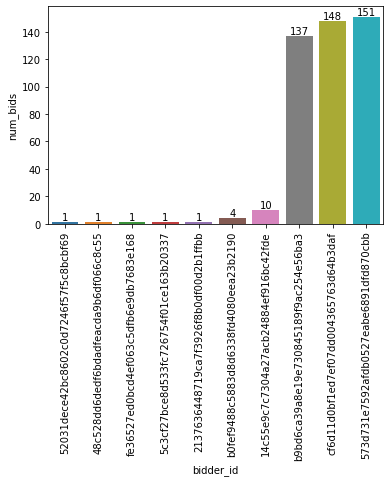

In [36]:
#removing outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = train_set[train_set['outcome'] == 1].sort_values('num_bids').head(10),
                           
                               x = 'bidder_id',
                               y = 'num_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

plt.show()

In [37]:
train_set[train_set['outcome'] == 1].sort_values('num_bids').head(6)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_fast_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
615,52031dece42bc8602c0d7246f57f5c8bcbf69,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
775,48c528dd6dedf6bdadfeacda9b6df066c8c55,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
392,fe36527ed0bcd4ef063c5dfb6e9db7683e168,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1669,5c3cf27bce8d533fc726754f01ce163b20337,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1102,2137636448719ca7f3926f8b0df00d2b1ffbb,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
148,b0fef9488c5883d8d6338fd4080eea23b2190,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.333333,4.0,1.5,1.5,0.5


In [38]:
train_set = train_set.drop([615, 775, 392, 1669, 1102], axis = 0)

In [39]:
train_set.groupby('outcome').mean().T

outcome,0.0,1.0
num_bids,1.392046e+03,4.208276e+03
num_auct,5.718901e+01,1.523878e+02
num_merch_type,9.853403e-01,1.000000e+00
num_device_type,7.282461e+01,1.719082e+02
num_time,1.157949e+03,3.857806e+03
num_ctry,1.239634e+01,2.761224e+01
num_ip,5.724309e+02,2.509571e+03
num_url,3.300979e+02,5.723163e+02
mean_diff,2.915060e+12,5.332332e+10
std_diff,4.195499e+12,5.086255e+11


In [40]:
train_set.shape

(2008, 29)

/Users/muthukumaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


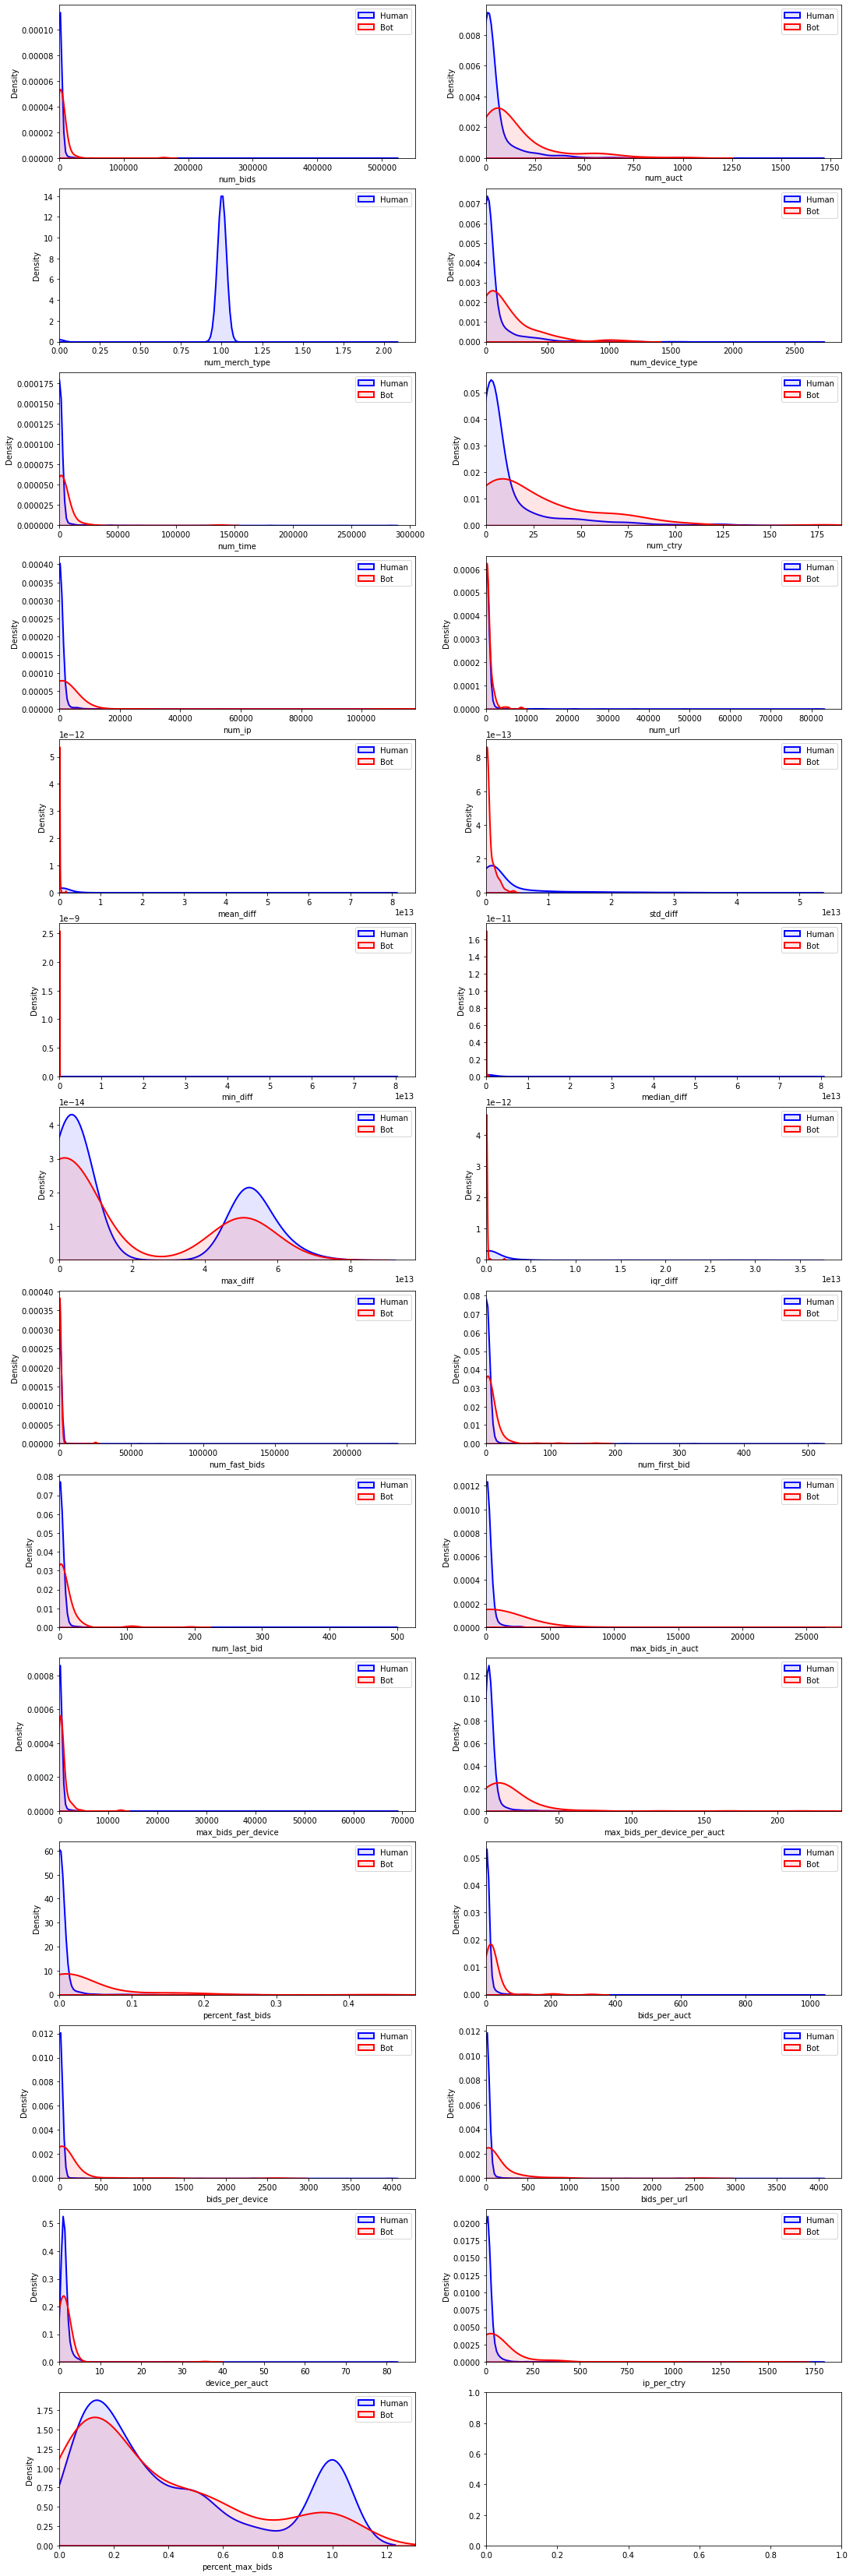

In [99]:
#plot density plot of all features to compare humans vs bots
import matplotlib.pyplot as plt
import seaborn as sns

features = train_set.columns.drop(['bidder_id', 'outcome'])

#denisty plot of bots vs humans
nrows = 14
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 60))
for i, column in enumerate(features):
    humans = sns.kdeplot(data = train_set[train_set['outcome'] == 0],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'blue',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Human').set_xlim(left = 0)
    bots = sns.kdeplot(data = train_set[train_set['outcome'] == 1],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'red',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Bot').set_xlim(left = 0)
    axes[i // ncols,i % ncols].legend()
    
plt.savefig('density.png', bbox_inches='tight')   
plt.show()


In [49]:
features = train_set.columns.drop(['bidder_id', 'outcome', 'num_merch_type',
                                   'num_fast_bids', 'max_bids_per_device', 'num_url'])
print(len(features))
features
X = train_set[features]
y = train_set['outcome']

23


In [53]:
#Cost benefit matrix - 

cost_benefit_matrix = np.array([
    [0, -3], 
    [-1, 0]])

In [54]:
from sklearn.metrics import confusion_matrix

def best_expected_value(y, y_scores):
    # Get thresholds
    prec, rec, thresholds = precision_recall_curve(y, y_scores)
    
    # Compute expected values at each threshold
    expected_values = []
    for t in thresholds:
        y_pred = y_scores > t # predictions at threshold
        conf_mat = confusion_matrix(y, y_pred, labels = [True, False], normalize = 'all')
        ev = (conf_mat * cost_benefit_matrix).sum()
        expected_values.append(ev)
        
    # Get maximum expected value
    return max(expected_values)

In [55]:
from sklearn.metrics import make_scorer

bev_score = make_scorer(best_expected_value, needs_threshold = True)

In [58]:
#Model random forest - hyper parameter tuning on training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve

X = train_set[features]
y = train_set['outcome']

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

#initialise model
rf_model = RandomForestClassifier(random_state = 42)

#initiate pipeline with scaling
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',rf_model)])

#parameter range for gridsearchCV
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#initialise parameter grid for gridsearch
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]

#initialise gridsearch pipeline
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring=bev_score,
        cv=cv)

grids = [rf_grid_search]

for pipe in grids:
    pipe.fit(X,y)

grid_dict = {0: 'Random Forest'}

for i, model in enumerate(grids):
    print('{} Best EV: {}'.format(grid_dict[i],
    model.best_score_))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))  


Random Forest Best EV: -0.07818141214128857
Random Forest Best Params: {'RF__max_depth': 8, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 4}


              precision    recall  f1-score   support

        True       0.57      0.59      0.58        29
       False       0.98      0.98      0.98       574

    accuracy                           0.96       603
   macro avg       0.77      0.78      0.78       603
weighted avg       0.96      0.96      0.96       603

Confusion matrix is:
 [[ 17  12]
 [ 13 561]]
RF Accuracy train-test-split is:
 0.9585406301824212

RF AUC_PRC train-test-split is:
 0.5960603492966177

RF precision score train-test-split is:
 0.5666666666666667

RF recall score train-test-split is:
 0.5862068965517241

RF f1 score train-test-split is:
 0.576271186440678
Best Threshold:0.24767363046025198 with EV:-0.07960199004975124.


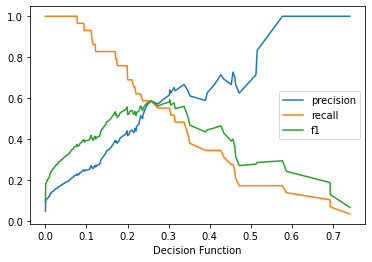

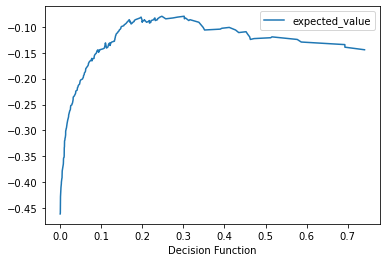

In [104]:
#using train-test-split - Random Forest
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


rf_model = RandomForestClassifier(random_state = 42, max_depth = 8, min_samples_leaf=1, min_samples_split=4)

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',rf_model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

rf_model_fit = pipe_rf.fit(X_train, y_train)
y_proba = rf_model_fit.predict_proba(X_test)[:, 1]

y_pred_rf = y_proba > 0.247
prec, rec, thresholds = precision_recall_curve(y_test, y_proba, pos_label = True)

f1 = 2*prec*rec/(prec + rec)

# metrics vs thresholds plot
pr_df = pd.DataFrame(index = thresholds)
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]
pr_df.plot()
plt.xlabel('Decision Function')

#ev vs thresholds plot
expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [True if score > t else False for score in y_proba]
    
    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

ev_df = pd.DataFrame(index = thresholds)
ev_df['expected_value'] = expected_values[:]
ev_df.plot()
plt.xlabel('Decision Function')

#final metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_rocauc = roc_auc_score(y_test, y_proba)
rf_prcauc = average_precision_score(y_test, y_proba)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

t = thresholds[0]
ev = expected_values[0]
for thr, e_val in zip(thresholds,expected_values):
    if e_val > ev:
        ev = e_val
        t = thr

print(classification_report(y_test, y_pred_rf, labels = [True, False]))
print(f"Confusion matrix is:\n {confusion_matrix(y_test,y_pred_rf, labels = [True, False])}")

print('RF Accuracy train-test-split is:\n', rf_accuracy)
print('\nRF AUC_PRC train-test-split is:\n', rf_prcauc)
print('\nRF precision score train-test-split is:\n', rf_precision)
print('\nRF recall score train-test-split is:\n', rf_recall)
print('\nRF f1 score train-test-split is:\n', rf_f1)

print(f"Best Threshold:{t} with EV:{ev}.")


In [83]:
#Model XGBoost - hyper parameter tuning on training set

X = train_set[features]
y = train_set['outcome']
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

#initialise model
xgb_model = xgb.XGBClassifier(random_state=42)

#initiate pipeline with scaling
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', xgb_model)])

#parameter range for gridsearchCV
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

#initialise parameter grid for gridsearch
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

#initialise gridsearch pipeline
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring=bev_score,
        cv=cv)

grids = [xgb_grid_search]

for pipe in grids:
    pipe.fit(X,y)

grid_dict = {0: 'XGBoost'}

for i, model in enumerate(grids):
    print('{} Best EV: {}'.format(grid_dict[i],
    model.best_score_))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))  


XGBoost Best EV: -0.08366645575116934
XGBoost Best Params: {'XGB__learning_rate': 0.3, 'XGB__max_depth': 6, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 1.0}


              precision    recall  f1-score   support

        True       0.55      0.62      0.58        29
       False       0.98      0.97      0.98       574

    accuracy                           0.96       603
   macro avg       0.76      0.80      0.78       603
weighted avg       0.96      0.96      0.96       603

Confusion matrix is:
 [[ 18  11]
 [ 15 559]]
XGB Accuracy train-test-split is:
 0.956882255389718

XGB AUC_PRC train-test-split is:
 0.5820530289311096

XGB precision score train-test-split is:
 0.5454545454545454

XGB recall score train-test-split is:
 0.6206896551724138

XGB f1 score train-test-split is:
 0.5806451612903226
Best Threshold:0.25072765350341797 with EV:-0.0779436152570481.


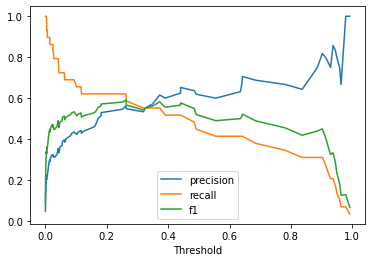

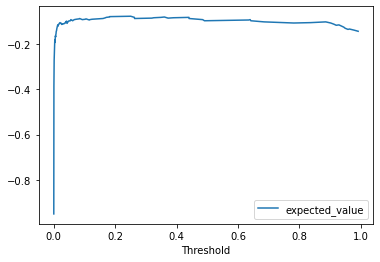

In [105]:
#using train-test-split - XGBoost

xgb_model = xgb.XGBClassifier(learning_rate=0.3, random_state=42, max_depth=6, min_child_weight=2,
                                  n_estimators=150, subsample=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', xgb_model)])

xgb_model_fit = pipe_xgb.fit(X_train, y_train)
y_proba = xgb_model_fit.predict_proba(X_test)[:, 1]

y_pred_xgb = y_proba > 0.2507
prec, rec, thresholds = precision_recall_curve(y_test, y_proba, pos_label = True)


f1 = 2*prec*rec/(prec + rec)

# metrics vs thresholds plot
pr_df = pd.DataFrame(index = thresholds)
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]
pr_df.plot()
plt.xlabel('Threshold')

#ev vs thresholds plot
expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [True if score > t else False for score in y_proba]
    
    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

ev_df = pd.DataFrame(index = thresholds)
ev_df['expected_value'] = expected_values[:]
ev_df.plot()
plt.xlabel('Threshold')    

#final metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_rocauc = roc_auc_score(y_test, y_proba)
xgb_prcauc = average_precision_score(y_test, y_proba)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

t = thresholds[0]
ev = expected_values[0]
for thr, e_val in zip(thresholds,expected_values):
    if e_val > ev:
        ev = e_val
        t = thr

print(classification_report(y_test, y_pred_xgb, labels = [True, False]))
print(f"Confusion matrix is:\n {confusion_matrix(y_test,y_pred_xgb, labels = [True, False])}")

print('XGB Accuracy train-test-split is:\n', xgb_accuracy)
print('\nXGB AUC_PRC train-test-split is:\n', xgb_prcauc)
print('\nXGB precision score train-test-split is:\n', xgb_precision)
print('\nXGB recall score train-test-split is:\n', xgb_recall)
print('\nXGB f1 score train-test-split is:\n', xgb_f1)

print(f"Best Threshold:{t} with EV:{ev}.")

In [88]:
#Model LR - hyper parameter tuning on training set

X = train_set[features]
y = train_set['outcome']

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

#initialise model
lr_model = LogisticRegression(random_state=42)

#initiate pipeline with scaling
pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('LR', lr_model)])

#parameter range for gridsearchCV
param_range_fl = [1.0, 0.75, 0.5, 0.25,  0.1]


#initialise parameter grid for gridsearch
lr_param_grid = [{'LR__penalty': ['l1','l2'],
                   'LR__C': param_range_fl}]

#initialise gridsearch pipeline
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring=bev_score,
        cv=cv)

grids = [lr_grid_search]

for pipe in grids:
    pipe.fit(X,y)

grid_dict = {0: 'LogisticRegression'}

for i, model in enumerate(grids):
    print('{} Best EV: {}'.format(grid_dict[i],
    model.best_score_))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))  


LogisticRegression Best EV: -0.11902085582064739
LogisticRegression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2'}


/Users/muthukumaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muthukumaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muthukumaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/muthukumaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.p

/var/folders/cf/_53pz7w174sb1d98fsh_vdd40000gn/T/ipykernel_19335/2696529848.py:17: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2*prec*rec/(prec + rec)


              precision    recall  f1-score   support

        True       0.30      0.62      0.40        29
       False       0.98      0.93      0.95       574

    accuracy                           0.91       603
   macro avg       0.64      0.77      0.68       603
weighted avg       0.95      0.91      0.93       603

Confusion matrix is:
 [[ 18  11]
 [ 42 532]]
LR Accuracy train-test-split is:
 0.912106135986733

LR AUC_PRC train-test-split is:
 0.3215512923603904

LR precision score train-test-split is:
 0.3

LR recall score train-test-split is:
 0.6206896551724138

LR f1 score train-test-split is:
 0.40449438202247195
Best Threshold:0.09539732419856858 with EV:-0.12106135986733002.


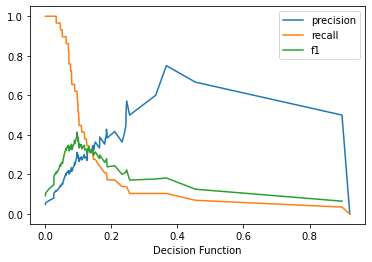

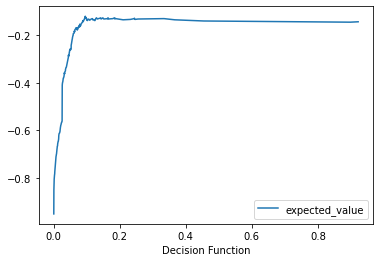

In [106]:
#using train-test-split - Logistic Regression

lr_model = LogisticRegression(random_state=42, penalty = 'l2', C= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('LR', lr_model)])

lr_model_fit = pipe_lr.fit(X_train, y_train)
y_proba = lr_model_fit.predict_proba(X_test)[:, 1]

y_pred_lr = y_proba > 0.095
prec, rec, thresholds = precision_recall_curve(y_test, y_proba, pos_label = True)


f1 = 2*prec*rec/(prec + rec)

# metrics vs thresholds plot
pr_df = pd.DataFrame(index = thresholds)
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]
pr_df.plot()
plt.xlabel('Decision Function')

#ev vs thresholds plot
expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [True if score > t else False for score in y_proba]

    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

ev_df = pd.DataFrame(index = thresholds)
ev_df['expected_value'] = expected_values[:]
ev_df.plot()
plt.xlabel('Decision Function')    

#final metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_rocauc = roc_auc_score(y_test, y_proba)
lr_prcauc = average_precision_score(y_test, y_proba)
lr_recall = recall_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_f1 = metrics.f1_score(y_test, y_pred_lr)

t = thresholds[0]
ev = expected_values[0]
for thr, e_val in zip(thresholds,expected_values):
    if e_val > ev:
        ev = e_val
        t = thr

print(classification_report(y_test, y_pred_lr, labels = [True, False]))
print(f"Confusion matrix is:\n {confusion_matrix(y_test,y_pred_lr, labels = [True, False])}")

print('LR Accuracy train-test-split is:\n', lr_accuracy)
print('\nLR AUC_PRC train-test-split is:\n', lr_prcauc)
print('\nLR precision score train-test-split is:\n', lr_precision)
print('\nLR recall score train-test-split is:\n', lr_recall)
print('\nLR f1 score train-test-split is:\n', lr_f1)

print(f"Best Threshold:{t} with EV:{ev}.")

In [93]:
#Model SVM - hyper parameter tuning on training set

X = train_set[features]
y = train_set['outcome']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )


#initialise model
svm_model = SVC(random_state = 42)

#initiate pipeline with scaling
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm_model)])

#parameter range for gridsearchCV

param_range_fl = [5.0, 4.0, 3.0, 2.0,1.0, 0.5, 0.1]


#initialise parameter grid for gridsearch
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range_fl}]

#initialise gridsearch pipeline
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring=bev_score,
        cv=cv)

grids = [svm_grid_search]

for pipe in grids:
    pipe.fit(X,y)

grid_dict = {0: 'SVM'}

for i, model in enumerate(grids):
    print('{} Best EV: {}'.format(grid_dict[i],
    model.best_score_))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))  


SVM Train AUC_PRC: -0.09909678539968488
SVM Best Params: {'SVM__C': 1.0, 'SVM__kernel': 'rbf'}


/var/folders/cf/_53pz7w174sb1d98fsh_vdd40000gn/T/ipykernel_19335/3066477396.py:18: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2*prec*rec/(prec + rec)


              precision    recall  f1-score   support

        True       0.43      0.62      0.51        29
       False       0.98      0.96      0.97       574

    accuracy                           0.94       603
   macro avg       0.70      0.79      0.74       603
weighted avg       0.95      0.94      0.95       603

Confusion matrix is:
 [[ 18  11]
 [ 24 550]]
SVM Accuracy train-test-split is:
 0.9419568822553898

SVM AUC_PRC train-test-split is:
 0.457797477231658

SVM precision score train-test-split is:
 0.42857142857142855

SVM recall score train-test-split is:
 0.6206896551724138

SVM f1 score train-test-split is:
 0.5070422535211268
Best Threshold:-0.9593349772397344 with EV:-0.0912106135986733.


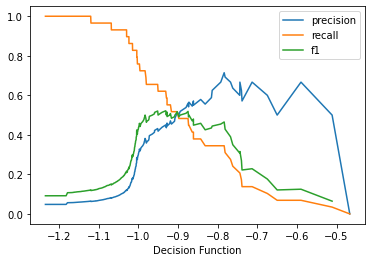

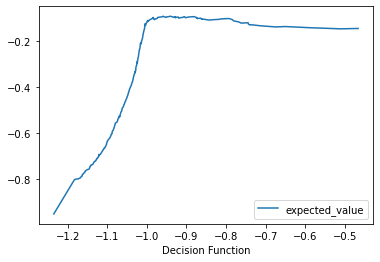

In [107]:
#using train-test-split - SVM

svm_model = SVC(random_state=42, kernel = 'rbf', C = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm_model)])

svm_model_fit = pipe_svm.fit(X_train, y_train)

y_proba = svm_model_fit.decision_function(X_test)

y_pred_svm = y_proba > -0.95

prec, rec, thresholds = precision_recall_curve(y_test, y_proba, pos_label = True)

f1 = 2*prec*rec/(prec + rec)

# metrics vs thresholds plot
pr_df = pd.DataFrame(index = thresholds)
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]
pr_df.plot()
plt.xlabel('Decision Function')

#ev vs thresholds plot
expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [True if score > t else False for score in y_proba]

    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

ev_df = pd.DataFrame(index = thresholds)
ev_df['expected_value'] = expected_values[:]
ev_df.plot()
plt.xlabel('Decision Function')    


#final metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_rocauc = roc_auc_score(y_test, y_proba)
svm_prcauc = average_precision_score(y_test, y_proba)
svm_recall = recall_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

t = thresholds[0]
ev = expected_values[0]
for thr, e_val in zip(thresholds,expected_values):
    if e_val > ev:
        ev = e_val
        t = thr

print(classification_report(y_test, y_pred_svm, labels = [True, False]))
print(f"Confusion matrix is:\n {confusion_matrix(y_test,y_pred_svm, labels = [True, False])}")

print('SVM Accuracy train-test-split is:\n', svm_accuracy)
print('\nSVM AUC_PRC train-test-split is:\n', svm_prcauc)
print('\nSVM precision score train-test-split is:\n', svm_precision)
print('\nSVM recall score train-test-split is:\n', svm_recall)
print('\nSVM f1 score train-test-split is:\n', svm_f1)

print(f"Best Threshold:{t} with EV:{ev}.")